## Setup


In [1]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_decrease_linear'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

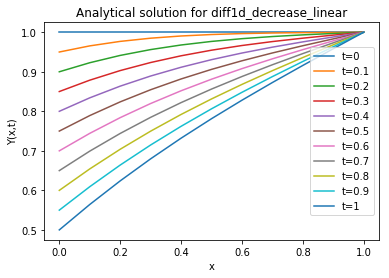

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [10]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
# Overflow with seed: 0, 1, 2, 3
np.random.seed(4)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2018-10-07 13:33:27.498430
Optimization terminated successfully.
         Current function value: 0.250073
         Iterations: 2558
         Function evaluations: 2788
         Gradient evaluations: 2788
8min 8s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.2500728083543674
 hess_inv: array([[ 4.33401329e+02,  1.37840656e+03, -2.34195741e+03, ...,
         5.34087073e+03, -1.94592801e+03, -1.56848951e+02],
       [ 1.37850214e+03,  3.51969001e+04, -4.00334770e+04, ...,
         1.77136350e+05, -2.58302338e+04, -2.89769286e+04],
       [-2.34212516e+03, -4.00318187e+04,  5.99518170e+04, ...,
        -2.47029560e+05,  3.57194427e+04,  2.99671448e+04],
       ...,
       [ 5.34153260e+03,  1.77124522e+05, -2.47016833e+05, ...,
         1.87840209e+06,  5.53056586e+04, -9.53282283e+04],
       [-1.94602839e+03, -2.58315374e+04,  3.57249502e+04, ...,
         5.52804082e+04,  8.82705209e+04,  1.82400477e+04],
       [-1.56958865e+02, -2.89777278e+04,  2.99697925e+04

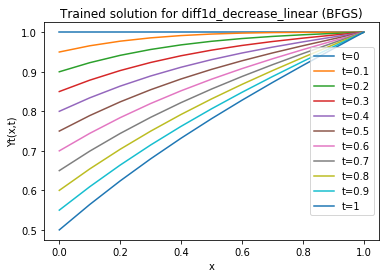

In [11]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

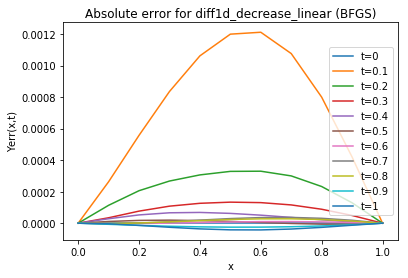

In [12]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

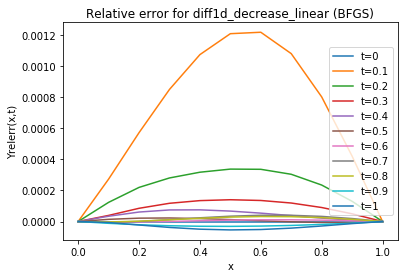

In [13]:
Yrelerr1 = (Yt1 - Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [14]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
# Overflow with seed: 0, 1, 2, 3
np.random.seed(4)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

2018-10-07 13:44:26.735232
         Current function value: 0.250060
         Iterations: 3334
         Function evaluations: 3635
         Gradient evaluations: 3623
11min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.2500598527228462
 hess_inv: array([[ 4.62829772e+02, -1.18318838e+02,  1.42233058e+03, ...,
         6.37850549e+04,  2.56600066e+04,  2.70939638e+03],
       [-1.16879204e+02,  5.32167702e+03, -2.87568158e+03, ...,
        -1.07717931e+05, -4.66644527e+04, -1.00740097e+04],
       [ 1.42397334e+03, -2.84205003e+03,  9.19438549e+03, ...,
         3.56344759e+05,  1.39502748e+05,  1.95662212e+04],
       ...,
       [ 6.40065810e+04, -1.05728862e+05,  3.56499085e+05, ...,
         1.78990097e+07,  7.06246771e+06,  8.81574148e+05],
       [ 2.57500999e+04, -4.58713185e+04,  1.39474798e+05, ...,
         7.05723032e+06,  2.81684149e+06,  3.36062834e+05],
       [ 2.70782060e+03, -1.00264003e+04,  1.97295015e+04, ...,
         8.90143349e+05,  3.3

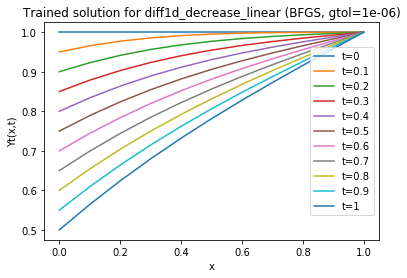

In [15]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

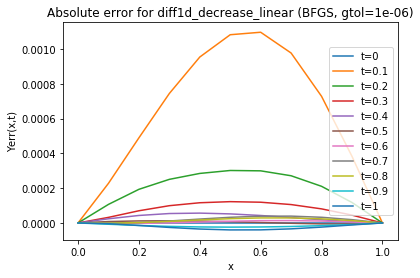

In [16]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

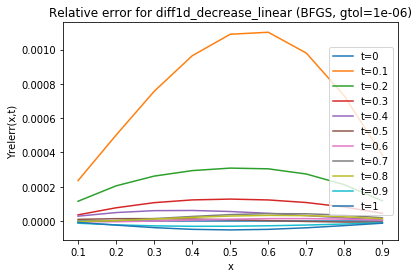

In [17]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));